# ARIMA FORECASTING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [95]:
df=pd.read_csv(r'C:\Users\hp\ss\Untitled Folder 2\perrin.csv')

In [96]:
df.columns=['Months','Sales']

In [11]:
df

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [97]:
df=df.dropna()

In [14]:
df

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
Months    105 non-null object
Sales     105 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [98]:
df['Months']=pd.to_datetime(df['Months'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
Months    105 non-null datetime64[ns]
Sales     105 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [99]:
df.set_index('Months',inplace=True)

In [21]:
df

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


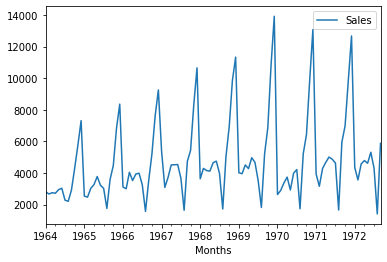

In [23]:
df.plot()

DICKEY FULLER TEST TO CHECK STATIONARITY

In [24]:
from statsmodels.tsa.stattools import adfuller

In [27]:
test_result=adfuller(df['Sales'])

In [30]:
pvalue=test_result[1]

## pvalue>0.05 do not reject null hypothesis
it is non stationary data

In [31]:
pvalue

0.3639157716602447

In [34]:
lag=test_result[2]

In [35]:
lag

11

In [100]:
 df['Seasonal_Sales']=df['Sales']-df['Sales'].shift(12)

In [76]:
df=df.dropna()

In [101]:
df

,Sales,Seasonal_Sales
Months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-05-01,4618.0,-392.0
1972-06-01,5312.0,438.0
1972-07-01,4298.0,-335.0


In [102]:
test_result_after=adfuller(df['Seasonal_Sales'].dropna())

In [103]:
test_result_after

(-7.626619157213163,
 2.060579696813685e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1294.7753384560438)

# p value is now less 0.05, we can say that we have removed stationarity

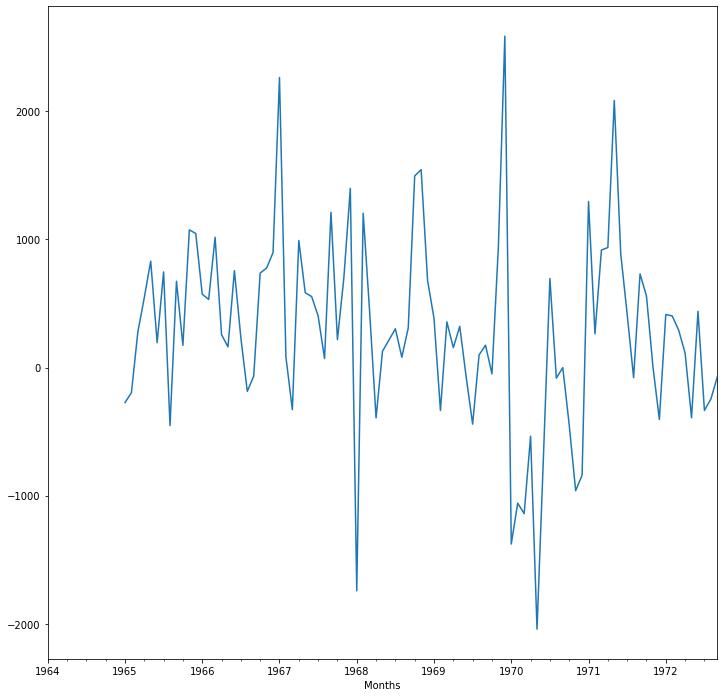

In [104]:
plt.figure(figsize=(12,12))
df['Seasonal_Sales'].plot()

# AutoRegressive Model

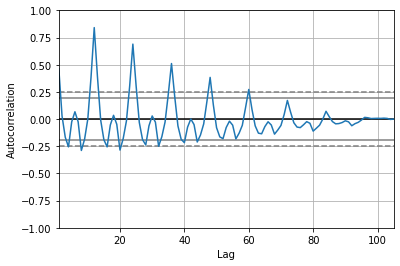

In [105]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [89]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [93]:
import statsmodels.api as sm


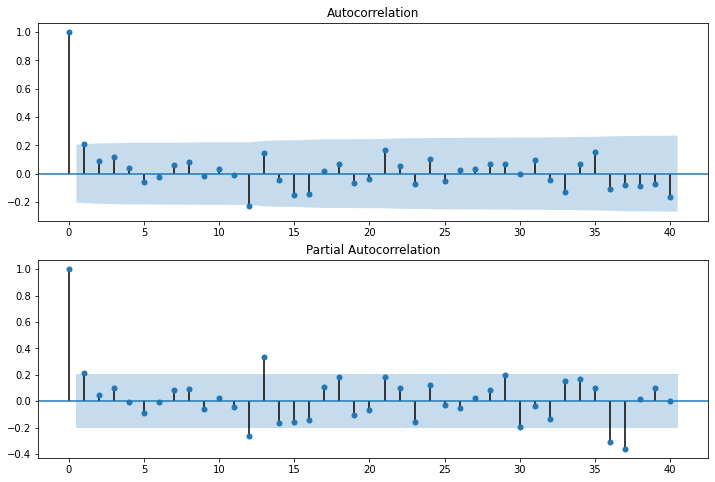

In [111]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal_Sales'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal_Sales'].iloc[13:],lags=40,ax=ax2)

Value for q for MA and p for AR are 1 and 1 with difference value d as 1

In [112]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA MODEL

In [113]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [114]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 28 Sep 2020   AIC                           1910.251
Time:                        18:13:58   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7822     12.405      1.836      0.069      -1.532      47.096
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

# AUTOREGRESSIVE MODEL

In [117]:
model_AR=ARIMA(df['Sales'],order=(0,0,1))
model_AR_fit=model_AR.fit()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [118]:
model_AR_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                     ARMA(0, 1)   Log Likelihood                -956.359
Method:                       css-mle   S.D. of innovations           2179.209
Date:                Mon, 28 Sep 2020   AIC                           1918.717
Time:                        18:17:20   BIC                           1926.679
Sample:                    01-01-1964   HQIC                          1921.943
                         - 09-01-1972                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4772.0302    347.742     13.723      0.000    4090.468    5453.592
ma.L1.Sales     0.6411      0.116      5.530      0.000       0.414       0.868
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.5597           +0.0000j            1.5597            0.5000
-----------------------------------------------------------------------------
"""

# Moving Average Model

In [119]:
model_MA=ARIMA(df['Sales'],order=(1,0,0))
model_MA_fit=model_MA.fit()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [121]:
model_MA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                     ARMA(1, 0)   Log Likelihood                -959.612
Method:                       css-mle   S.D. of innovations           2250.901
Date:                Mon, 28 Sep 2020   AIC                           1925.225
Time:                        18:18:26   BIC                           1933.187
Sample:                    01-01-1964   HQIC                          1928.451
                         - 09-01-1972                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4753.7876    404.680     11.747      0.000    3960.629    5546.946
ar.L1.Sales     0.4616      0.086      5.359      0.000       0.293       0.630
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1666           +0.0000j            2.1666            0.0000
-----------------------------------------------------------------------------
"""

# forecasting the new sales

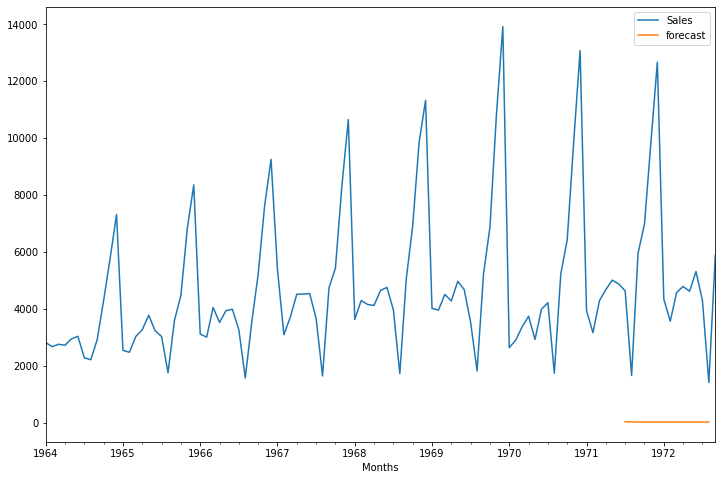

In [126]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

We can see here ARIMA is providing wrong values because we have seasonality in the data and we have applied ARIMA without deseasonalizing the data

# Seasonal ARIMA OR SARIMA

In [127]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #importing SARIMA
results=model.fit()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


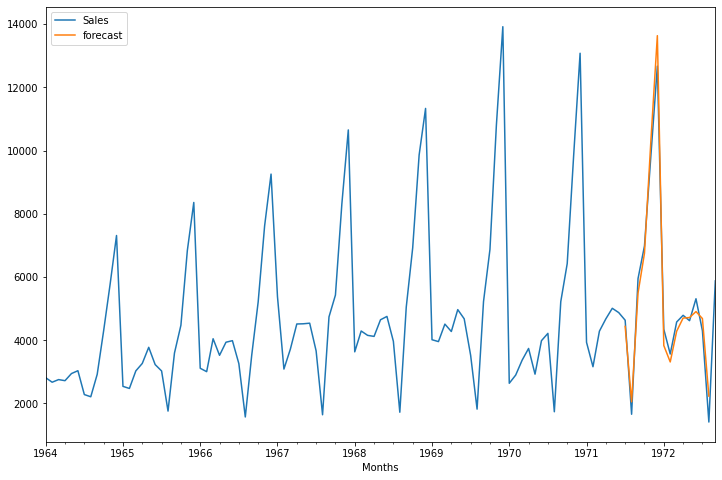

In [130]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

# Now we will predict future sales using this model i.e we will do Forecast to upcoming 24 months

In [131]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

### Importing 24 months dates from the time where df dataset has ended

In [132]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [133]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)  

In [134]:
future_datest_df #creating dataframe for future sales

,Sales,Seasonal_Sales,forecast
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN


In [135]:
future_df=pd.concat([df,future_datest_df])  # joining both of the dataframes

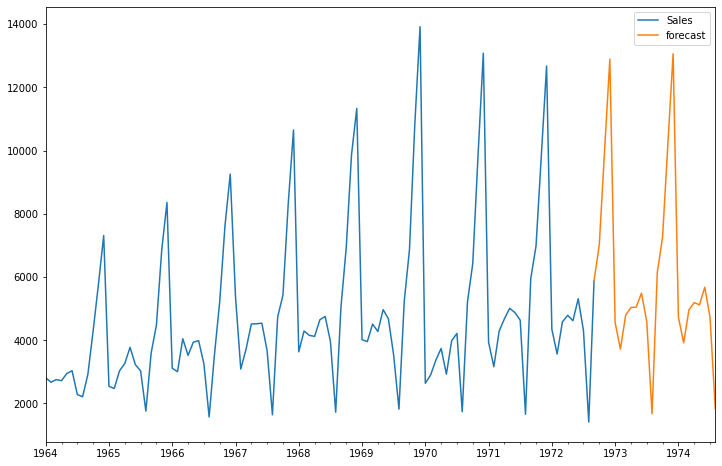

In [137]:
future_df['forecast'] = results.predict(start = 104, end = 128, dynamic= True)   # predictions for next 24 months
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [138]:
future_df

,Sales,Seasonal_Sales,forecast
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN
...,...,...,...
1974-04-01,NaN,NaN,5189.453100
1974-05-01,NaN,NaN,5119.495295
1974-06-01,NaN,NaN,5675.242682
1974-07-01,NaN,NaN,4726.202433


# end